<a href="https://colab.research.google.com/github/Ashavennela/AICTE_ipnyb_project/blob/main/AICTE_1st_%26_2nd_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Download dataset directly from OWID GitHub
url = 'https://github.com/owid/co2-data/raw/master/owid-co2-data.csv'
data = pd.read_csv(url)

# Display sample
data.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose key columns for emissions modeling
columns = ['country', 'year', 'co2', 'methane', 'nitrous_oxide', 'gdp', 'population']
df = data[columns]

# Drop rows with missing values
df = df.dropna()

# Use only specific countries (optional)
df = df[df['country'].isin(['India', 'United States', 'China', 'Germany', 'France'])]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])  # Convert country to numeric


In [ ]:
# Features: country, year, GDP, population
X = df[['country', 'year', 'gdp', 'population']]

# Target: Predict CO2 emissions
y = df['co2']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'✅ R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.2f}')


✅ R² Score: 0.9933
📉 RMSE: 197.96


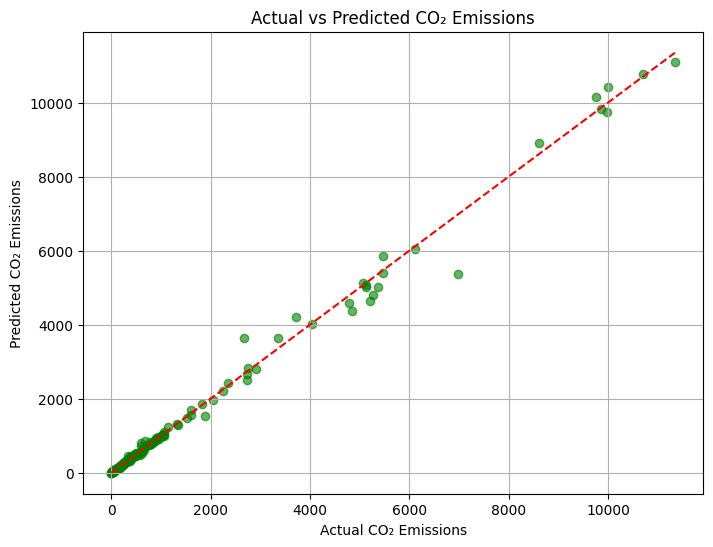

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.grid(True)
plt.show()
